Ideias:

New is always better (Heat map para ver se ando a ouvir musica que adicionei recentemente)

Divisão por estilos

Divisão por artistas

Horas ouvidas por dia

Horas mais frequentes a ouvir

Estilo mais predominante por hora

Caracteristicas da musica

In [1]:
# !pip install spotipy
# !pip install wordcloud
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install git+https://github.com/plamere/spotipy.git --upgrade
# !pip install seaborn
# !pip install python-dotenv


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials
import pandas as pd
import time
import numpy as np
from functions.spotipyTools import *
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns 
from dotenv import load_dotenv
import os

In [3]:
load_dotenv()

True

In [4]:
e_client_id = os.environ["client_id"]
e_client_key = os.environ["client_key"]
e_playlist_id = os.environ["playlist_id"]
e_user_id = os.environ["user_id"]

sp_login = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=e_client_id,
                                               client_secret=e_client_key,
                                               redirect_uri="http://localhost:8888/callback",
                                               scope="user-read-recently-played"))


client_credentials_manager = SpotifyClientCredentials(e_client_id, e_client_key)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [5]:
# sp_login.current_user_recently_played()

In [6]:
all_tracks = get_playlist_tracks(e_user_id, e_playlist_id, sp)

track_info_list = []

for item in all_tracks:
  track_info_list.append(get_track_info(item, sp))

df_tracks = pd.DataFrame(track_info_list, columns=['name', 'artist_name', 'album_name', 'album_date', 'album_popularity', 'track_duration', 'danceability', 'energy', 'instrumentalness', 'liveness', 'tempo','artist_url'])

In [7]:
#df_tracks['album_year'] = pd.to_datetime(df_tracks['album_year'], format='%Y-%m-%d').dt.year
df_tracks['album_year'] = pd.to_datetime(df_tracks['album_date'], format='%Y-%m-%d').dt.year

In [8]:
track_minutes = np.floor(df_tracks['track_duration']/1000/60).astype(int).astype(str)
track_seconds = np.mod(df_tracks['track_duration']/1000,60).astype(int).astype(str)
track_time = track_minutes.append(track_seconds).groupby(level=0).agg(':'.join)
df_tracks['track_duration'] = pd.to_datetime(track_time, format='%M:%S').dt.time

C:\Users\hsilv\AppData\Local\Temp\ipykernel_28180\3838577584.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  track_time = track_minutes.append(track_seconds).groupby(level=0).agg(':'.join)


In [9]:
df_tracks.tail()

,name,artist_name,album_name,album_date,album_popularity,track_duration,danceability,energy,instrumentalness,liveness,tempo,artist_url,album_year
1213,Blood Moon,Giraffe Tongue Orchestra,Broken Lines,2016-09-23,38,00:03:19,0.665,0.892,0.000046,0.3270,120.020,https://open.spotify.com/artist/1vfusWMe7GXj7a...,2016
1214,Texas Sun,Khruangbin,Texas Sun,2020-02-07,74,00:04:12,0.636,0.634,0.147000,0.0998,111.563,https://open.spotify.com/artist/2mVVjNmdjXZZDv...,2020
1215,Gypsy Caravan,Wolfmother,Victorious,2016-02-19,47,00:03:34,0.209,0.944,0.000824,0.2910,171.959,https://open.spotify.com/artist/3yEnArbNHyTCwM...,2016
1216,Fallen Torches,Mastodon,Fallen Torches,2020-07-31,30,00:04:22,0.348,0.937,0.000735,0.2690,160.006,https://open.spotify.com/artist/1Dvfqq39HxvCJ3...,2020
1217,Tondo,Disclosure,ENERGY (Deluxe),2020-08-28,63,00:05:29,0.675,0.920,0.117000,0.3290,132.001,https://open.spotify.com/artist/6nS5roXSAGhTGr...,2020


In [10]:
artists = df_tracks['artist_url'].unique()
genres = get_artist_genre(artists, sp)

In [11]:
exploded_genres = pd.Series(genres, name='Genre').explode().reset_index()
text = ' '.join(str(i) for i in exploded_genres.Genre)

In [12]:
wordcloud = WordCloud(background_color='White').generate(text)

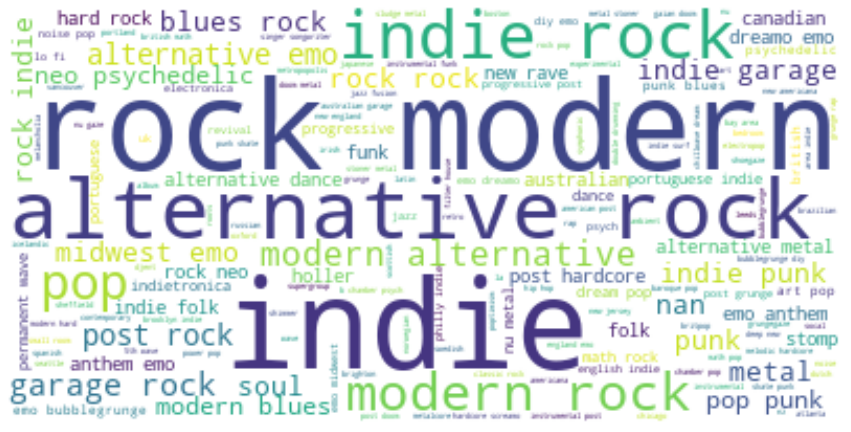

In [13]:
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()